83281/83281 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
195196/195196 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


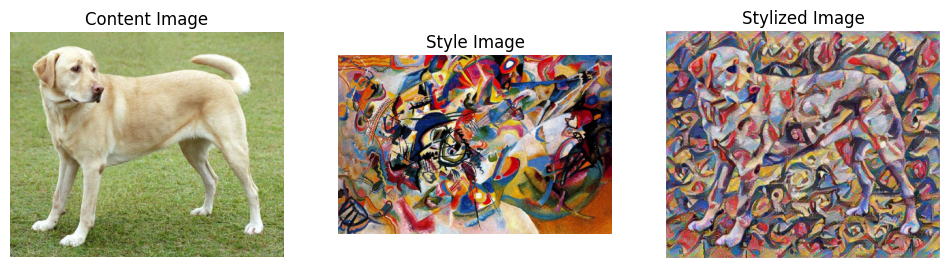

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image

# 1. Load the arbitrary style transfer model from TF Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim / long_dim

    new_shape = tf.cast(shape * scale, tf.int32)
    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

def tensor_to_image(tensor):
    tensor = tensor * 255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

# 2. Define Image URLs (You can replace these with your own links)
content_path = tf.keras.utils.get_file('banyan_tree.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('art_style.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

# 3. Process Images
content_image = load_img(content_path)
style_image = load_img(style_path)

# 4. Run Style Transfer
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

# 5. Display Results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Content Image")
plt.imshow(tensor_to_image(content_image))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Style Image")
plt.imshow(tensor_to_image(style_image))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Stylized Image")
plt.imshow(tensor_to_image(stylized_image))
plt.axis('off')

plt.show()